In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Data collection and processing
#loading the data
liver_data = pd.read_csv('/content/drive/MyDrive/Liver/Liver_disease_data.csv')

In [3]:
liver_data.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [4]:
liver_data.tail()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1
1699,80,0,24.060783,9.526447,0,0,9.261426,0,1,73.572893,1


In [5]:
liver_data.shape

(1700, 11)

In [6]:
liver_data.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [7]:
liver_data['Diagnosis'].value_counts()

,count
Diagnosis,
1,936
0,764


In [8]:
liver_data_zero=liver_data[liver_data['Diagnosis']==0]
liver_data_one=liver_data[liver_data['Diagnosis']==1]
liver_data_one=liver_data_one.sample(n=764)
liver_data=pd.concat([liver_data_one,liver_data_zero],axis=0)

In [9]:
liver_data["Diagnosis"].value_counts()

,count
Diagnosis,
1,764
0,764


In [10]:
liver_data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


In [11]:
liver_data = liver_data.fillna(liver_data.mean())

In [12]:
liver_data.groupby('Diagnosis').mean()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest
Diagnosis,,,,,,,,,,
0,47.346859,0.399215,26.362161,7.605006,0.191099,0.434555,5.368608,0.100785,0.086387,50.855888
1,53.399215,0.587696,28.910605,11.744180,0.374346,0.577225,4.702976,0.185864,0.214660,66.473412


In [13]:
X = liver_data.drop(columns='Diagnosis', axis=1)
Y = liver_data['Diagnosis']

In [14]:
print(X)

      Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
90     73       0  24.716320           15.536067        1            0   
1048   21       1  33.303065           13.880348        0            0   
1138   65       0  33.168731           12.640384        1            1   
953    44       1  24.193341           14.575724        0            2   
1636   51       0  36.453010            9.325066        0            2   
...   ...     ...        ...                 ...      ...          ...   
1684   73       1  29.237112           13.898368        0            0   
1685   40       0  36.710270            0.211022        0            2   
1688   74       1  30.463176            6.917177        0            1   
1689   67       0  30.826816            0.704303        1            0   
1693   26       1  36.526132           10.746810        1            1   

      PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  
90            5.466256         0           

In [15]:
print(Y)

90      1
1048    1
1138    1
953     1
1636    1
       ..
1684    0
1685    0
1688    0
1689    0
1693    0
Name: Diagnosis, Length: 1528, dtype: int64


In [16]:
#Now, we'll split the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(1528, 10) (1222, 10) (306, 10)


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
# Model Training -> Logistic Regression
model = LogisticRegression()

In [20]:
#Training logistic Regression model with traning data
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
# Model evaluation
# Accuracy or Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8248772504091653


In [23]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.826797385620915


In [25]:
# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)
print("",classification_report(Y_test,X_test_prediction))

[[127  26]
 [ 27 126]]
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       153
           1       0.83      0.82      0.83       153

    accuracy                           0.83       306
   macro avg       0.83      0.83      0.83       306
weighted avg       0.83      0.83      0.83       306



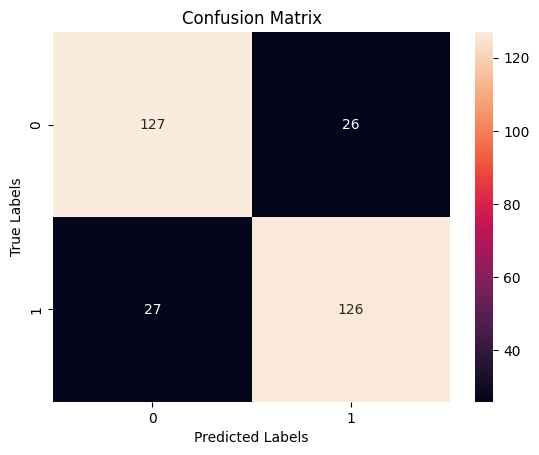

In [26]:
# Heatmap Visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [27]:
# Prediction System
input_data = (77,1,29.90803797150921,15.233517524273253,0,0,3.598825977545548,0,0,90.64914296594557)
#Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0]==1:
  print(' The person has liver disease')
else:
  print('The person does not have liver disease')

[1]
 The person has liver disease
